This notebook provides a quick exploration of regression using raster temperature and meteorological station.
Check:
https://stackoverflow.com/questions/45175201/how-can-i-interpolate-station-data-with-kriging-in-python

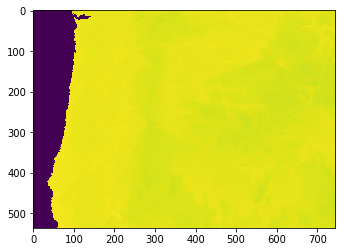

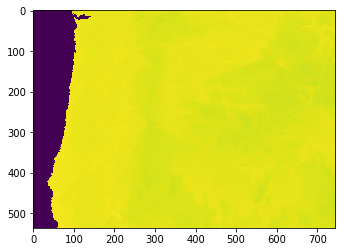

CRS({})

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import subprocess
import pandas as pd
import os
from rasterio import plot


in_dir="/nfs/bparmentier-data/Data/workshop_spatial/climate_regression/data/Oregon_covariates"
out_dir="/nfs/bparmentier-data/Data/workshop_spatial/climate_regression/outputs"

#epsg 2991
crs_reg = "+proj=lcc +lat_1=43 +lat_2=45.5 +lat_0=41.75 +lon_0=-120.5 +x_0=400000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

infile = "mean_month1_rescaled.rst"
#infile = "mean_month1_rescaled.tif"
#infile = "lst_mean_month1_rescaled.tif"

fileglob = "*asc.zip"
pathglob = os.path.join(in_dir, fileglob)
l_f = glob.glob(pathglob)
l_f.sort() #order input by decade
    l_dir = map(lambda x: os.path.splitext(x)[0],l_f) #remmove extension
    l_dir = map(lambda x: os.path.join(out_dir,os.path.basename(x)),l_dir) #set the directory output


# Read raster bands directly to Numpy arrays.
with rasterio.open(os.path.join(in_dir,infile)) as src:
        r_lst = src.read(1)

    # Combine arrays using the 'iadd' ufunc. Expecting that the sum will
    # exceed the 8-bit integer range, initialize it as 16-bit. Adding other
    # arrays to it in-place converts those arrays up and preserves the type
    # of the total array.
    #total = np.zeros(r.shape, dtype=rasterio.uint16)
    #for band in (r, g, b):
    #    total += band
    #total = total // 3

plot.show(r_lst)
plot.show(r_lst,cmap='viridis')

src.crs # not defined with *.rst

In [13]:
r_lst.size
#r_lst.ndim #array dimension
src.height
#src.profile
type(r_lst)

numpy.ndarray

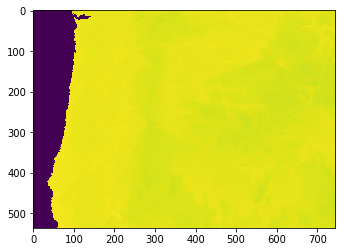

In [14]:
#plt.figure(figsize=(6,8.5))
#plt.imshow(subset)
plt.imshow(r_lst)
#plt.hist(r_lst)


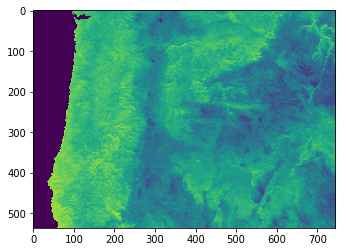

In [15]:
#see: https://matplotlib.org/users/image_tutorial.html
plt.imshow(r_lst, clim=(259.0, 287.0))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 4.000e+00, 6.000e+00,
        7.000e+00, 8.000e+00, 6.000e+00, 1.000e+01, 1.100e+01, 1.400e+01,
        6.000e+00, 2.400e+01, 1.800e+01, 2.700e+01, 3.300e+01, 3.600e+01,
        4.100e+01, 5.000e+01, 7.700e+01, 6.800e+01, 7.300e+01, 8.400e+01,
        1.190e+02, 1.110e+02, 1.400e+02, 1.350e+02, 1.820e+02, 1.730e+02,
        2.020e+02, 2.230e+02, 2.380e+02, 2.890e+02, 3.170e+02, 3.280e+02,
        3.920e+02, 4.380e+02, 4.780e+02, 5.140e+02, 4.960e+02, 5.900e+02,
        7.000e+02, 7.140e+02, 7.150e+02, 8.290e+02, 9.490e+02, 9.770e+02,
        1.029e+03, 1.066e+03, 1.125e+0

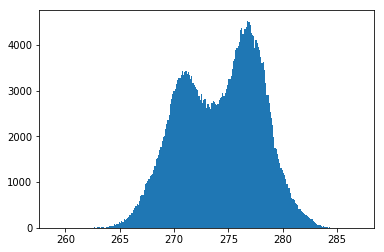

In [16]:
plt.hist(r_lst.ravel(),bins=256,range=(259.0,287.0))